In [134]:
# Importing all required packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso
import sklearn.metrics as metrics
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [135]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [136]:
# Importing dataset

housing = pd.read_csv('train.csv')
housing.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [137]:
#Shape of the dataset
housing.shape

(1460, 81)

In [138]:
#Dataset Info
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [139]:
#Creating Age column representing age of the house
housing['AgeHouse'] = housing['YrSold'] - housing['YearBuilt']

In [140]:
housing.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolQC Fence MiscFeature MiscVal MoSold YrSold  \
0         Lvl    AllPub  ...    NaN   NaN         NaN       0      2   2008   
1         Lvl    AllPub  ...    NaN   NaN         NaN       0      5   2007   
2         Lvl    AllPub  ...    NaN   NaN         NaN       0      9   2008   
3         Lvl    AllPub  ...    NaN   NaN         NaN       0      2   2006   
4         Lvl    AllPub  ...    NaN   NaN         NaN       0     12   2008   

  SaleType  SaleCondition  SalePrice  AgeHouse  
0       WD         Normal     208500         5  
1       WD         Normal     181500        31  
2       WD         Normal     223500         7  
3       WD        Abnorml     140000        91  
4       WD         Normal     250000         8  

[5 rows x 82 columns]

In [141]:
# removing columns which aren't useful for our analysis
housing.drop(['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold', 'MoSold'], axis=1, inplace=True)

In [142]:
# Converting column type for categorical variable from numeric to object
housing['MSSubClass'] = housing['MSSubClass'].astype('object')
housing['OverallQual'] = housing['OverallQual'].astype('object')
housing['OverallCond'] = housing['OverallCond'].astype('object')

In [143]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 77 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   object 
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   object 
 18  OverallC

In [144]:
housing.describe()

Id  LotFrontage        LotArea   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1201.000000    1460.000000  1452.000000  1460.000000   
mean    730.500000    70.049958   10516.828082   103.685262   443.639726   
std     421.610009    24.284752    9981.264932   181.066207   456.098091   
min       1.000000    21.000000    1300.000000     0.000000     0.000000   
25%     365.750000    59.000000    7553.500000     0.000000     0.000000   
50%     730.500000    69.000000    9478.500000     0.000000   383.500000   
75%    1095.250000    80.000000   11601.500000   166.000000   712.250000   
max    1460.000000   313.000000  215245.000000  1600.000000  5644.000000   

        BsmtFinSF2    BsmtUnfSF  TotalBsmtSF     1stFlrSF     2ndFlrSF  ...  \
count  1460.000000  1460.000000  1460.000000  1460.000000  1460.000000  ...   
mean     46.549315   567.240411  1057.429452  1162.626712   346.992466  ...   
std     161.319273   441.866955   438.705324   386.587738   436.528436  ...   
min       0.000000     0.000000     0.000000   334.000000     0.000000  ...   
25%       0.000000   223.000000   795.750000   882.000000     0.000000  ...   
50%       0.000000   477.500000   991.500000  1087.000000     0.000000  ...   
75%       0.000000   808.000000  1298.250000  1391.250000   728.000000  ...   
max    1474.000000  2336.000000  6110.000000  4692.000000  2065.000000  ...   

        GarageArea   WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  \
count  1460.000000  1460.000000  1460.000000    1460.000000  1460.000000   
mean    472.980137    94.244521    46.660274      21.954110     3.409589   
std     213.804841   125.338794    66.256028      61.119149    29.317331   
min       0.000000     0.000000     0.000000       0.000000     0.000000   
25%     334.500000     0.000000     0.000000       0.000000     0.000000   
50%     480.000000     0.000000    25.000000       0.000000     0.000000   
75%     576.000000   168.000000    68.000000       0.000000     0.000000   
max    1418.000000   857.000000   547.000000     552.000000   508.000000   

       ScreenPorch     PoolArea       MiscVal      SalePrice     AgeHouse  
count  1460.000000  1460.000000   1460.000000    1460.000000  1460.000000  
mean     15.060959     2.758904     43.489041  180921.195890    36.547945  
std      55.757415    40.177307    496.123024   79442.502883    30.250152  
min       0.000000     0.000000      0.000000   34900.000000     0.000000  
25%       0.000000     0.000000      0.000000  129975.000000     8.000000  
50%       0.000000     0.000000      0.000000  163000.000000    35.000000  
75%       0.000000     0.000000      0.000000  214000.000000    54.000000  
max     480.000000   738.000000  15500.000000  755000.000000   136.000000  

[8 rows x 31 columns]

In [145]:
#Replacing few NA values with relevant values.
housing['Alley'] = housing['Alley'].replace(np.nan, 'No Alley')
housing['BsmtQual'] = housing['BsmtQual'].replace(np.nan, 'No Basement')
housing['BsmtCond'] = housing['BsmtCond'].replace(np.nan, 'No Basement')
housing['BsmtExposure'] = housing['BsmtExposure'].replace(np.nan, 'No Basement')
housing['BsmtFinType1'] = housing['BsmtFinType1'].replace(np.nan, 'No Basement')
housing['BsmtFinType2'] = housing['BsmtFinType2'].replace(np.nan, 'No Basement')
housing['FireplaceQu'] = housing['FireplaceQu'].replace(np.nan, 'No Fireplace')
housing['GarageType'] = housing['GarageType'].replace(np.nan, 'No Garage')
housing['GarageFinish'] = housing['GarageFinish'].replace(np.nan, 'No Garage')
housing['GarageQual'] = housing['GarageQual'].replace(np.nan, 'No Garage')
housing['GarageCond'] = housing['GarageCond'].replace(np.nan, 'No Garage')
housing['PoolQC'] = housing['PoolQC'].replace(np.nan, 'No Pool')
housing['Fence'] = housing['Fence'].replace(np.nan, 'No Fence')
housing['MiscFeature'] = housing['MiscFeature'].replace(np.nan, 'No MiscFeature')

In [146]:
# Checking percentage of missing values in columns
(round(100*(housing.isnull().sum()/len(housing.index)),2)).to_frame('Nulls').sort_values(by='Nulls' , ascending=False)

Nulls
LotFrontage   17.74
MasVnrType     0.55
MasVnrArea     0.55
Electrical     0.07
KitchenAbvGr   0.00
...             ...
Foundation     0.00
ExterCond      0.00
ExterQual      0.00
Exterior2nd    0.00
AgeHouse       0.00

[77 rows x 1 columns]

In [147]:
# We can see that LotFrontage column has 17.74% missing values
# Let's see the distribution of the value of the LotFrontage column
housing['LotFrontage'].describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [148]:
# Imputing missing values of LotFrontage with median
housing.loc[np.isnan(housing['LotFrontage']), 'LotFrontage'] = housing['LotFrontage'].median()

In [149]:
# Treating the missing values for MasVnrType column
housing['MasVnrType'].describe()

count     1452
unique       4
top       None
freq       864
Name: MasVnrType, dtype: object

In [150]:
# Imputing missing values of MasVnrType with mode
housing['MasVnrType'].fillna(housing['MasVnrType'].mode()[0], inplace=True)

In [151]:
# Treating the missing values for MasVnrArea column
housing['MasVnrArea'].describe()

count    1452.000000
mean      103.685262
std       181.066207
min         0.000000
25%         0.000000
50%         0.000000
75%       166.000000
max      1600.000000
Name: MasVnrArea, dtype: float64

In [152]:
# Deleting the rows for missing values in MasVnrArea
housing = housing[~np.isnan(housing['MasVnrArea'])]

In [153]:
# Treating missing values for Electrical column
# Let us check the count for values in Electrical 
housing['Electrical'].value_counts()

SBrkr    1326
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [154]:
# Imputing Electrical column missing values with SBrkr
housing.loc[pd.isnull(housing['Electrical']), ['Electrical']] = 'SBrkr'

In [155]:
# Checking percentage of missing values in columns
(round(100*(housing.isnull().sum()/len(housing.index)),2)).to_frame('Nulls').sort_values(by='Nulls' , ascending=False)

Nulls
Id              0.0
BedroomAbvGr    0.0
GarageType      0.0
FireplaceQu     0.0
Fireplaces      0.0
...             ...
ExterQual       0.0
MasVnrArea      0.0
MasVnrType      0.0
Exterior2nd     0.0
AgeHouse        0.0

[77 rows x 1 columns]

In [156]:
# OUTLIERS TREATMENT
# Numeric columns list
numeric_cols = list(housing.select_dtypes(include=['int64', 'float64']).columns)
# Removing "Id" column
numeric_cols.remove('Id')
print(numeric_cols)

['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'SalePrice', 'AgeHouse']


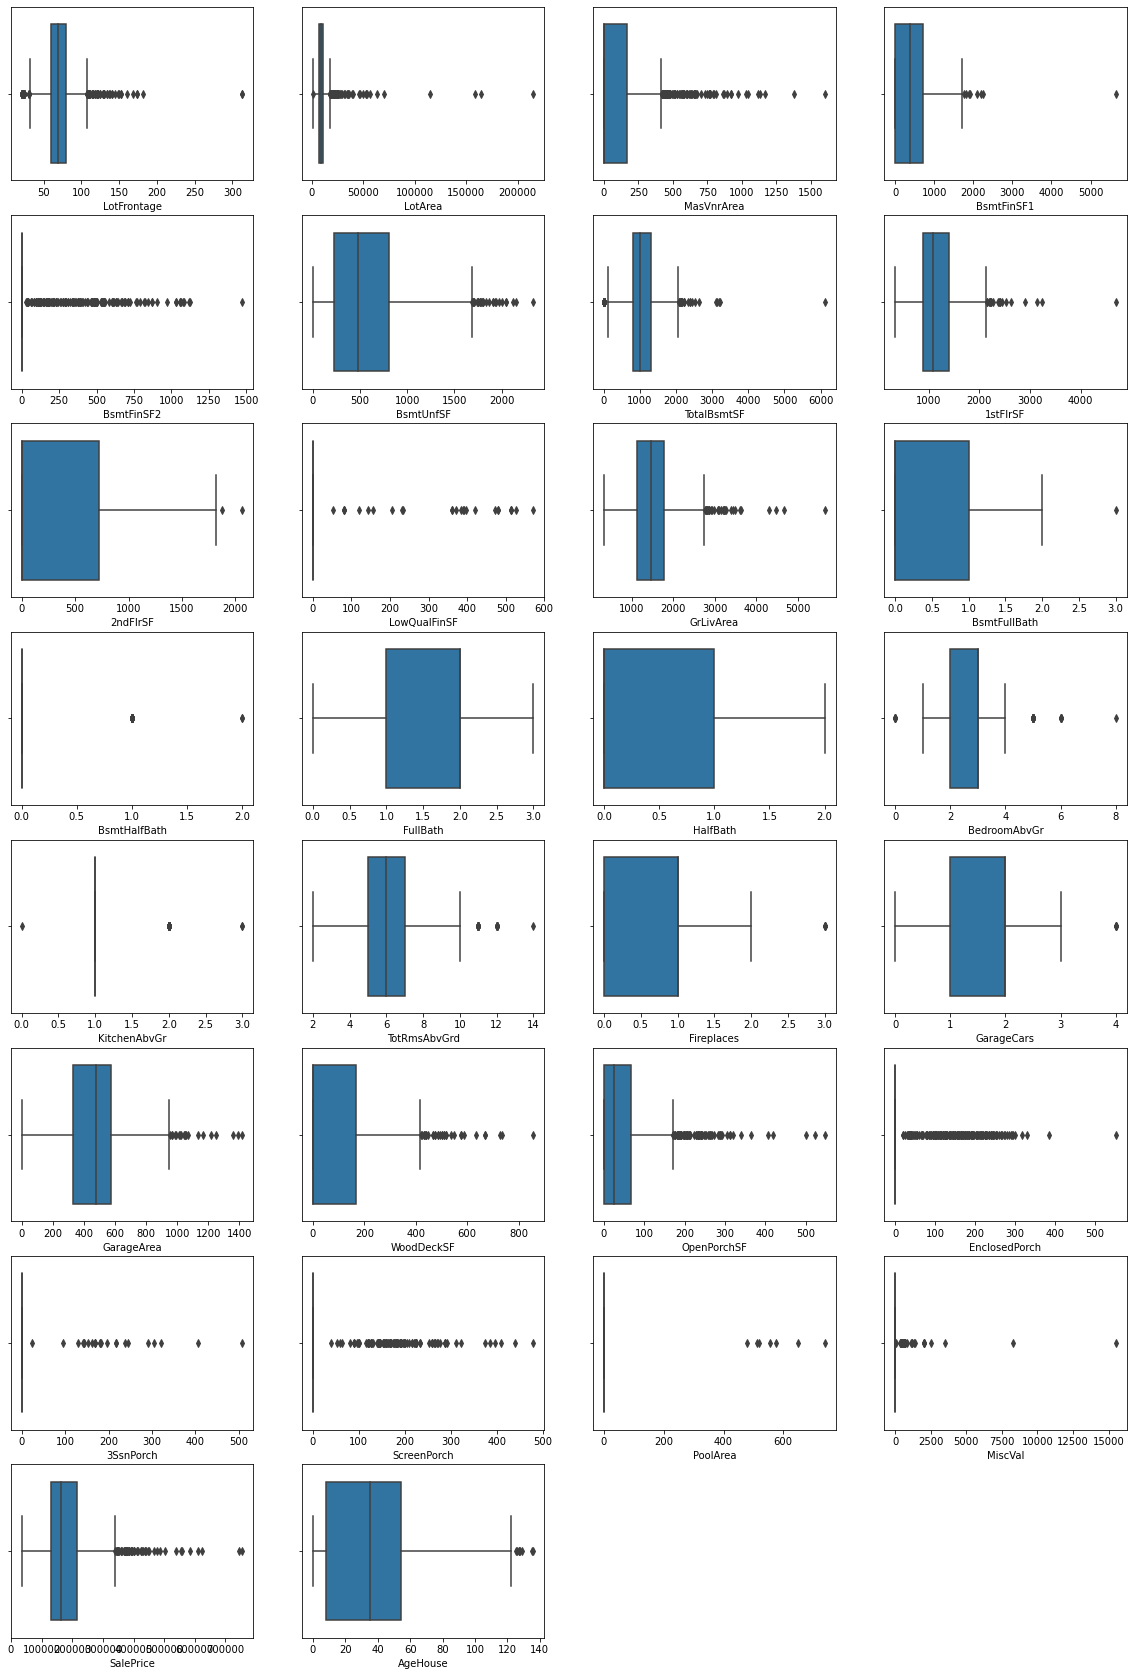

In [157]:
# Plotting the spread of the numeric columns
plt.figure(figsize=(20,30))
for i in enumerate(numeric_cols):
    plt.subplot(8,4,i[0]+1)
    sns.boxplot(x=i[1], data=housing)

In [158]:
# List of categorical columns
category_cols = housing.select_dtypes(include='object').columns
category_cols

Index(['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive',
       'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition'],
      dtype='object')

In [159]:
housing[category_cols].describe()

MSSubClass MSZoning Street     Alley LotShape LandContour Utilities  \
count         1452     1452   1452      1452     1452        1452      1452   
unique          15        5      2         3        4           4         2   
top             20       RL   Pave  No Alley      Reg         Lvl    AllPub   
freq           532     1146   1446      1362      919        1303      1451   

       LotConfig LandSlope Neighborhood  ... GarageType GarageFinish  \
count       1452      1452         1452  ...       1452         1452   
unique         5         3           25  ...          7            4   
top       Inside       Gtl        NAmes  ...     Attchd          Unf   
freq        1046      1374          225  ...        863          605   

       GarageQual GarageCond  PavedDrive   PoolQC     Fence     MiscFeature  \
count        1452       1452        1452     1452      1452            1452   
unique          6          6           3        4         5               5   
top            TA         TA           Y  No Pool  No Fence  No MiscFeature   
freq         1303       1318        1332     1445      1171            1398   

       SaleType SaleCondition  
count      1452          1452  
unique        9             6  
top          WD        Normal  
freq       1262          1194  

[4 rows x 46 columns]

In [160]:
#Dropping few coulms having very lesser types of values
housing.drop(['Street','Alley','LandContour','Utilities','LandSlope','Condition2','BldgType','RoofMatl','BsmtCond','Heating',
         'CentralAir','Electrical','Functional','GarageQual','GarageCond','PavedDrive','PoolQC','MiscFeature','SaleType','ExterCond','BsmtFinType2'],
       axis=1, inplace=True)

In [161]:
#Creating the dummy variables for the categorical variables with multiple levels.
#Dropping the dummy column, which has very low number of values (E.g.:-Other)

In [162]:
housing = housing.replace({'MSZoning': {'C (all)':'Other', 'RH':'Other', 'FV':'Other'}})

In [163]:
housing['MSZoning'].value_counts()

RL       1146
RM        218
Other      88
Name: MSZoning, dtype: int64

In [164]:
# Creating dummy variable
mz = pd.get_dummies(housing['MSZoning'], prefix = 'MSZoning')
# Dropping MSZoning_Other column
mz = mz.drop('MSZoning_Other', axis=1)
# Adding result to master df
housing = pd.concat([housing, mz], axis=1)
# Dropping original variable
housing = housing.drop('MSZoning', axis=1)

In [165]:
housing = housing.replace({'LotShape': {'IR2':'Other', 'IR3':'Other'}})

In [166]:
housing['LotShape'].value_counts()

Reg      919
IR1      482
Other     51
Name: LotShape, dtype: int64

In [167]:
# Creating dummy variable
ls = pd.get_dummies(housing['LotShape'], prefix = 'LotShape')
# Dropping Other column
ls = ls.drop('LotShape_Other', axis=1)
# Adding result to master df
housing = pd.concat([housing, ls], axis=1)
# Dropping original variable
housing = housing.drop('LotShape', axis=1)

In [168]:
housing = housing.replace({'LotConfig': {'CulDSac':'Other', 'FR2':'Other', 'FR3':'Other'}})

In [169]:
housing['LotConfig'].value_counts()

Inside    1046
Corner     262
Other      144
Name: LotConfig, dtype: int64

In [170]:
# Creating dummy variable
lc = pd.get_dummies(housing['LotConfig'], prefix = 'LotConfig')
# Dropping Other column
lc = lc.drop('LotConfig_Other', axis=1)
# Adding result to master df
housing = pd.concat([housing, lc], axis=1)
# Dropping original variable
housing = housing.drop('LotConfig', axis=1)

In [171]:
housing = housing.replace({'Neighborhood': {'Blueste':'Other', 'NPkVill':'Other', 'Veenker':'Other', 'BrDale':'Other', 'Blmngtn':'Other',
                                 'MeadowV':'Other', 'SWISU':'Other', 'StoneBr':'Other', 'ClearCr':'Other',
                                 'IDOTRR':'Other', 'Timber':'Other', 'NoRidge':'Other', 'Mitchel':'Other'}})

In [172]:
# Creating dummy variable
nh = pd.get_dummies(housing['Neighborhood'], prefix = 'Neighborhood')
# Dropping Other column
nh = nh.drop('Neighborhood_Other', axis=1)
# Adding result to master df
housing = pd.concat([housing, nh], axis=1)
# Dropping original variable
housing = housing.drop('Neighborhood', axis=1)

In [173]:
housing = housing.replace({'Condition1': {'RRNe':'Other', 'RRNn':'Other', 'PosA':'Other', 'RRAe':'Other', 'PosN':'Other',
                               'RRAn':'Other', 'Artery':'Other'}})

In [174]:
# Creating dummy variable
co = pd.get_dummies(housing['Condition1'], prefix = 'Condition1')
# Dropping Other column
co = co.drop('Condition1_Other', axis=1)
# Adding result to master df
housing = pd.concat([housing, co], axis=1)
# Dropping original variable
housing = housing.drop('Condition1', axis=1)

In [175]:
housing = housing.replace({'HouseStyle': {'2.5Fin':'Other', '2.5Unf':'Other', '1.5Unf':'Other', 'SFoyer':'Other', 'SLvl':'Other'}})

In [176]:
# Creating dummy variable
hs = pd.get_dummies(housing['HouseStyle'], prefix = 'HouseStyle')
# Dropping Other column
hs = hs.drop('HouseStyle_Other', axis=1)
# Adding result to master df
housing = pd.concat([housing, hs], axis=1)
# Dropping original variable
housing = housing.drop('HouseStyle', axis=1)

In [177]:
housing = housing.replace({'OverallQual': {1:'Other', 2:'Other', 10:'Other', 3:'Other', 9:'Other'}})

In [178]:
# Creating dummy variable
oq = pd.get_dummies(housing['OverallQual'], prefix = 'OverallQual')
# Dropping Other column
oq = oq.drop('OverallQual_Other', axis=1)
# Adding result to master df
housing = pd.concat([housing, oq], axis=1)
# Dropping original variable
housing = housing.drop('OverallQual', axis=1)

In [179]:
housing = housing.replace({'OverallCond': {1:'Other', 2:'Other', 9:'Other', 3:'Other', 4:'Other'}})

In [180]:
# Creating dummy variable
oc = pd.get_dummies(housing['OverallCond'], prefix = 'OverallCond')
# Dropping Other column
oc = oc.drop('OverallCond_Other', axis=1)
# Adding result to master df
housing = pd.concat([housing, oc], axis=1)
# Dropping original variable
housing = housing.drop('OverallCond', axis=1)

In [181]:
housing = housing.replace({'RoofStyle': {'Shed':'Other', 'Mansard':'Other', 'Gambrel':'Other', 'Flat':'Other'}})

In [182]:
# Creating dummy variable
rs = pd.get_dummies(housing['RoofStyle'], prefix = 'RoofStyle')
# Dropping Other column
rs = rs.drop('RoofStyle_Other', axis=1)
# Adding result to master df
housing = pd.concat([housing, rs], axis=1)
# Dropping original variable
housing = housing.drop('RoofStyle', axis=1)

In [183]:
housing = housing.replace({'Exterior1st': {'ImStucc':'Other', 'AsphShn':'Other', 'CBlock':'Other', 'BrkComm':'Other','Stone':'Other',
                              'AsbShng':'Other','Stucco':'Other','WdShing':'Other','BrkFace':'Other','CemntBd':'Other'}})

In [184]:
# Creating dummy variable
ex = pd.get_dummies(housing['Exterior1st'], prefix = 'Exterior1st')
# Dropping Other column
ex = ex.drop('Exterior1st_Other', axis=1)
# Adding result to master df
housing = pd.concat([housing, ex], axis=1)
# Dropping original variable
housing = housing.drop('Exterior1st', axis=1)

In [185]:
housing = housing.replace({'Exterior2nd': {'CBlock':'Other', 'AsphShn':'Other', 'Stone':'Other', 'Brk Cmn':'Other','ImStucc':'Other',
                              'AsbShng':'Other','BrkFace':'Other','Stucco':'Other','Wd Shng':'Other','CmentBd':'Other'}})

In [186]:
# Creating dummy variable
ex2 = pd.get_dummies(housing['Exterior2nd'], prefix = 'Exterior2nd')
# Dropping Other column
ex2 = ex2.drop('Exterior2nd_Other', axis=1)
# Adding result to master df
housing = pd.concat([housing, ex2], axis=1)
# Dropping original variable
housing= housing.drop('Exterior2nd', axis=1)

In [187]:
# Creating dummy variable
mv = pd.get_dummies(housing['MasVnrType'], prefix = 'MasVnrType')
# Dropping Other column
mv = mv.drop('MasVnrType_BrkCmn', axis=1)
# Adding result to master df
housing = pd.concat([housing, mv], axis=1)
# Dropping original variable
housing = housing.drop('MasVnrType', axis=1)

In [188]:
housing = housing.replace({'ExterQual': {'Fa':'Other', 'Ex':'Other'}})

In [189]:
# Creating dummy variable
exq = pd.get_dummies(housing['ExterQual'], prefix = 'ExterQual')
# Dropping Other column
exq = exq.drop('ExterQual_Other', axis=1)
# Adding result to master df
housing = pd.concat([housing, exq], axis=1)
# Dropping original variable
housing = housing.drop('ExterQual', axis=1)

In [190]:
housing = housing.replace({'Foundation': {'Wood':'Other', 'Stone':'Other','Slab':'Other'}})

In [191]:
# Creating dummy variable
fo = pd.get_dummies(housing['Foundation'], prefix = 'Foundation')
# Dropping Other column
fo = fo.drop('Foundation_Other', axis=1)
# Adding result to master df
housing = pd.concat([housing, fo], axis=1)
# Dropping original variable
housing = housing.drop('Foundation', axis=1)

In [192]:
housing = housing.replace({'BsmtQual': {'Fa':'Other', 'No Basement':'Other'}})

In [193]:
# Creating dummy variable
bq = pd.get_dummies(housing['BsmtQual'], prefix = 'BsmtQual')
# Dropping Other column
bq = bq.drop('BsmtQual_Other', axis=1)
# Adding result to master df
housing = pd.concat([housing, bq], axis=1)
# Dropping original variable
housing = housing.drop('BsmtQual', axis=1)

In [194]:
# Creating dummy variable
be = pd.get_dummies(housing['BsmtExposure'], prefix = 'BsmtExposure')
# Dropping Other column
be = be.drop('BsmtExposure_No Basement', axis=1)
# Adding result to master df
housing = pd.concat([housing, be], axis=1)
# Dropping original variable
housing = housing.drop('BsmtExposure', axis=1)

In [195]:
# Creating dummy variable
bf = pd.get_dummies(housing['BsmtFinType1'], prefix = 'BsmtFinType1')
# Dropping Other column
bf = bf.drop('BsmtFinType1_No Basement', axis=1)
# Adding result to master df
housing = pd.concat([housing, bf], axis=1)
# Dropping original variable
housing = housing.drop('BsmtFinType1', axis=1)

In [196]:
housing = housing.replace({'HeatingQC': {'Fa':'Other', 'Po':'Other'}})

In [197]:
# Creating dummy variable
hc = pd.get_dummies(housing['HeatingQC'], prefix = 'HeatingQC')
# Dropping Other column
hc = hc.drop('HeatingQC_Other', axis=1)
# Adding result to master df
housing = pd.concat([housing, hc], axis=1)
# Dropping original variable
housing = housing.drop('HeatingQC', axis=1)

In [198]:
housing = housing.replace({'KitchenQual': {'Fa':'Other', 'Ex':'Other'}})

In [199]:
# Creating dummy variable
kq = pd.get_dummies(housing['KitchenQual'], prefix = 'KitchenQual')
# Dropping Other column
kq = kq.drop('KitchenQual_Other', axis=1)
# Adding result to master df
housing = pd.concat([housing, kq], axis=1)
# Dropping original variable
housing = housing.drop('KitchenQual', axis=1)

In [200]:
housing = housing.replace({'FireplaceQu': {'Fa':'Other', 'Ex':'Other','Po':'Other'}})

In [201]:
# Creating dummy variable
fq = pd.get_dummies(housing['FireplaceQu'], prefix = 'FireplaceQu')
# Dropping Other column
fq = fq.drop('FireplaceQu_Other', axis=1)
# Adding result to master df
housing = pd.concat([housing, fq], axis=1)
# Dropping original variable
housing = housing.drop('FireplaceQu', axis=1)

In [202]:
housing = housing.replace({'GarageType': {'2Types':'Other', 'CarPort':'Other','Basment':'Other'}})

In [203]:
# Creating dummy variable
gt = pd.get_dummies(housing['GarageType'], prefix = 'GarageType')
# Dropping Other column
gt = gt.drop('GarageType_Other', axis=1)
# Adding result to master df
housing = pd.concat([housing, gt], axis=1)
# Dropping original variable
housing = housing.drop('GarageType', axis=1)

In [204]:
# Creating dummy variable
gf = pd.get_dummies(housing['GarageFinish'], prefix = 'GarageFinish')
# Dropping Other column
gf = gf.drop('GarageFinish_No Garage', axis=1)
# Adding result to master df
housing = pd.concat([housing, gf], axis=1)
# Dropping original variable
housing = housing.drop('GarageFinish', axis=1)

In [205]:
housing = housing.replace({'Fence': {'MnWw':'Other', 'GdWo':'Other','GdPrv':'Other'}})

In [206]:
# Creating dummy variable
fe = pd.get_dummies(housing['Fence'], prefix = 'Fence')
# Dropping Other column
fe = fe.drop('Fence_Other', axis=1)
# Adding result to master df
housing = pd.concat([housing, fe], axis=1)
# Dropping original variable
housing = housing.drop('Fence', axis=1)

In [207]:
housing = housing.replace({'SaleCondition': {'AdjLand':'Other', 'Alloca':'Other','Family':'Other'}})

In [208]:
# Creating dummy variable
se = pd.get_dummies(housing['SaleCondition'], prefix = 'SaleCondition')
# Dropping Other column
se = se.drop('SaleCondition_Other', axis=1)
# Adding result to master df
housing = pd.concat([housing, se], axis=1)
# Dropping original variable
housing = housing.drop('SaleCondition', axis=1)

In [209]:
housing = housing.replace({'MSSubClass': {40:'Other', 180:'Other',45:'Other', 75:'Other',85:'Other',190:'Other',90:'Other',
                               80:'Other',70:'Other',160:'Other',30:'Other'}})

In [210]:
# Creating dummy variable
ms = pd.get_dummies(housing['MSSubClass'], prefix = 'MSSubClass')
# Dropping Other column
ms = ms.drop('MSSubClass_Other', axis=1)
# Adding result to master df
housing = pd.concat([housing, ms], axis=1)
# Dropping original variable
housing = housing.drop('MSSubClass', axis=1)

In [211]:
housing.shape

(1452, 120)

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

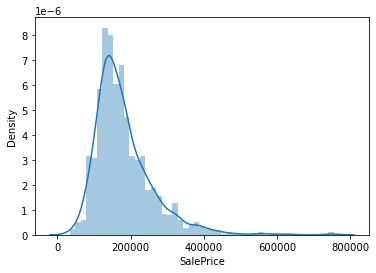

In [212]:
#Checking distribution of the target column SalePrice
sns.distplot(housing['SalePrice'])

In [213]:
# Dropping the Id column
housing = housing.drop('Id', axis=1)

In [214]:
# Splitting data into train and test set with 80:20 ratio
housing_train, housing_test = train_test_split(housing, train_size=0.8, test_size=0.2, random_state=100)

In [215]:
print(housing_train.shape)
print(housing_test.shape)

(1161, 119)
(291, 119)


In [216]:
# Normalization method

In [217]:
# Instantiate the scaler
scaler = MinMaxScaler()

In [218]:
# Sclaing only the numeric variables. We don't need to scale the binary variables as they are already scaled into 0 and 1
# Numeric columns list
numeric_cols = list(housing_train.select_dtypes(include=['int64', 'float64']).columns)
# Fit the data into scaler and transform
housing_train[numeric_cols] = scaler.fit_transform(housing_train[numeric_cols])
housing_train.head()

LotFrontage   LotArea  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
744      0.068493  0.019140    0.000000    0.129872    0.000000   0.258562   
1184     0.099315  0.158139    0.141250    0.205351    0.000000   0.176798   
369      0.164384  0.039870    0.000000    0.012757    0.228926   0.313784   
627      0.202055  0.038795    0.102500    0.119419    0.117125   0.149829   
517      0.198630  0.041637    0.575625    0.000000    0.000000   0.541096   

      TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  ...  GarageFinish_Unf  \
744      0.218822  0.230151  0.000000           0.0  ...                 0   
1184     0.257283  0.284075  0.000000           0.0  ...                 0   
369      0.173977  0.218678  0.000000           0.0  ...                 0   
627      0.189198  0.272143  0.000000           0.0  ...                 0   
517      0.206874  0.216384  0.516707           0.0  ...                 0   

      Fence_MnPrv  Fence_No Fence  SaleCondition_Abnorml  \
744             0               1                      0   
1184            0               1                      0   
369             0               1                      0   
627             0               1                      0   
517             0               1                      0   

      SaleCondition_Normal  SaleCondition_Partial  MSSubClass_20  \
744                      1                      0              0   
1184                     1                      0              1   
369                      1                      0              1   
627                      1                      0              0   
517                      1                      0              0   

      MSSubClass_50  MSSubClass_60  MSSubClass_120  
744               0              0               1  
1184              0              0               0  
369               0              0               0  
627               0              0               0  
517               0              1               0  

[5 rows x 119 columns]

In [219]:
# Variables more than 0.70 correlations 
c = housing_train.corr().abs()
s = c.unstack()
so = s.sort_values(kind="quicksort", ascending=False)
housing_corr = pd.DataFrame(so)
#df_corr.columns = ['correlations']
print(housing_corr[(housing_corr[0] < 1) & (housing_corr[0] > 0.7)])

                                                          0
Exterior1st_VinylSd      Exterior2nd_VinylSd       0.979074
Exterior2nd_VinylSd      Exterior1st_VinylSd       0.979074
Exterior2nd_MetalSd      Exterior1st_MetalSd       0.970070
Exterior1st_MetalSd      Exterior2nd_MetalSd       0.970070
MSSubClass_50            HouseStyle_1.5Fin         0.933651
HouseStyle_1.5Fin        MSSubClass_50             0.933651
RoofStyle_Gable          RoofStyle_Hip             0.924827
RoofStyle_Hip            RoofStyle_Gable           0.924827
LotShape_IR1             LotShape_Reg              0.919456
LotShape_Reg             LotShape_IR1              0.919456
ExterQual_Gd             ExterQual_TA              0.908388
ExterQual_TA             ExterQual_Gd              0.908388
FireplaceQu_No Fireplace Fireplaces                0.897846
Fireplaces               FireplaceQu_No Fireplace  0.897846
GarageCars               GarageArea                0.883644
GarageArea               GarageCars     

In [220]:
#Removing one variable from the highly correlated variables pair
housing_train = housing_train.drop(['Exterior2nd_VinylSd','Exterior2nd_MetalSd','HouseStyle_1.5Fin','RoofStyle_Hip','LotShape_IR1',
                         'ExterQual_Gd','Fireplaces','GarageCars','Exterior2nd_HdBoard','Exterior2nd_Wd Sdng',
                         'KitchenQual_Gd','TotRmsAbvGrd','HouseStyle_2Story','MSZoning_RM','MasVnrType_BrkFace',
                         'TotalBsmtSF','Foundation_CBlock','HouseStyle_1Story','BsmtQual_Gd','LotConfig_Corner',
                         'Exterior2nd_Plywood','Fence_MnPrv','GarageType_Detchd'], axis=1)

In [221]:
housing_train.shape

(1161, 96)

In [222]:
# Popping out the SalePrice column for y_train
y_train = housing_train.pop('SalePrice')
# Creating X_train
X_train = housing_train

In [223]:
X_train.head()

LotFrontage   LotArea  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
744      0.068493  0.019140    0.000000    0.129872    0.000000   0.258562   
1184     0.099315  0.158139    0.141250    0.205351    0.000000   0.176798   
369      0.164384  0.039870    0.000000    0.012757    0.228926   0.313784   
627      0.202055  0.038795    0.102500    0.119419    0.117125   0.149829   
517      0.198630  0.041637    0.575625    0.000000    0.000000   0.541096   

      1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  ...  GarageFinish_RFn  \
744   0.230151  0.000000           0.0   0.188960  ...                 1   
1184  0.284075  0.000000           0.0   0.233233  ...                 1   
369   0.218678  0.000000           0.0   0.179540  ...                 0   
627   0.272143  0.000000           0.0   0.223436  ...                 1   
517   0.216384  0.516707           0.0   0.378674  ...                 1   

      GarageFinish_Unf  Fence_No Fence  SaleCondition_Abnorml  \
744                  0               1                      0   
1184                 0               1                      0   
369                  0               1                      0   
627                  0               1                      0   
517                  0               1                      0   

      SaleCondition_Normal  SaleCondition_Partial  MSSubClass_20  \
744                      1                      0              0   
1184                     1                      0              1   
369                      1                      0              1   
627                      1                      0              0   
517                      1                      0              0   

      MSSubClass_50  MSSubClass_60  MSSubClass_120  
744               0              0               1  
1184              0              0               0  
369               0              0               0  
627               0              0               0  
517               0              1               0  

[5 rows x 95 columns]

In [224]:
y_train.head()

744     0.204337
1184    0.213773
369     0.178989
627     0.166315
517     0.324039
Name: SalePrice, dtype: float64

In [225]:
# Scale the test set variables with min-max scaler
# We don't fit scaler on the test set. We only transform the test set.
housing_test[numeric_cols] = scaler.transform(housing_test[numeric_cols]) 
housing_test.head()

LotFrontage   LotArea  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
157      0.243151  0.050027    0.052500    0.000000         0.0   0.331336   
337      0.167808  0.036622    0.070625    0.143515         0.0   0.310788   
1120     0.130137  0.032546    0.000000    0.000000         0.0   0.433219   
563      0.154110  0.095726    0.000000    0.000000         0.0   0.497860   
371      0.202055  0.073944    0.000000    0.000000         0.0   0.000000   

      TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  ...  GarageFinish_Unf  \
157      0.126678  0.100964  0.578208           0.0  ...                 0   
337      0.251391  0.275815  0.000000           0.0  ...                 0   
1120     0.165630  0.155576  0.000000           0.0  ...                 1   
563      0.190344  0.190225  0.247458           0.0  ...                 0   
371      0.000000  0.180358  0.226634           0.0  ...                 0   

      Fence_MnPrv  Fence_No Fence  SaleCondition_Abnorml  \
157             0               1                      0   
337             0               1                      0   
1120            1               0                      0   
563             0               1                      0   
371             0               1                      0   

      SaleCondition_Normal  SaleCondition_Partial  MSSubClass_20  \
157                      0                      1              0   
337                      1                      0              1   
1120                     1                      0              0   
563                      1                      0              0   
371                      1                      0              0   

      MSSubClass_50  MSSubClass_60  MSSubClass_120  
157               0              1               0  
337               0              0               0  
1120              0              0               0  
563               1              0               0  
371               1              0               0  

[5 rows x 119 columns]

In [226]:
# popping out the SalePrice column to create y_test
y_test = housing_test.pop('SalePrice')
# Creating X_test
X_test = housing_test

In [227]:
# Retaining the columns of X_train to X_test
X_test = X_test[X_train.columns]
X_test.head()

LotFrontage   LotArea  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
157      0.243151  0.050027    0.052500    0.000000         0.0   0.331336   
337      0.167808  0.036622    0.070625    0.143515         0.0   0.310788   
1120     0.130137  0.032546    0.000000    0.000000         0.0   0.433219   
563      0.154110  0.095726    0.000000    0.000000         0.0   0.497860   
371      0.202055  0.073944    0.000000    0.000000         0.0   0.000000   

      1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  ...  GarageFinish_RFn  \
157   0.100964  0.578208           0.0   0.307837  ...                 0   
337   0.275815  0.000000           0.0   0.226451  ...                 1   
1120  0.155576  0.000000           0.0   0.127732  ...                 0   
563   0.190225  0.247458           0.0   0.252449  ...                 0   
371   0.180358  0.226634           0.0   0.236247  ...                 0   

      GarageFinish_Unf  Fence_No Fence  SaleCondition_Abnorml  \
157                  0               1                      0   
337                  0               1                      0   
1120                 1               0                      0   
563                  0               1                      0   
371                  0               1                      0   

      SaleCondition_Normal  SaleCondition_Partial  MSSubClass_20  \
157                      0                      1              0   
337                      1                      0              1   
1120                     1                      0              0   
563                      1                      0              0   
371                      1                      0              0   

      MSSubClass_50  MSSubClass_60  MSSubClass_120  
157               0              1               0  
337               0              0               0  
1120              0              0               0  
563               1              0               0  
371               1              0               0  

[5 rows x 95 columns]

In [228]:
# Instantiate the linear regression
lm = LinearRegression()
# Fit the model with train set
lm.fit(X_train, y_train)

LinearRegression()

In [229]:
# Predict the model with train set
y_train_pred = lm.predict(X_train)
# r2 score for the train model
metrics.r2_score(y_true = y_train, y_pred = y_train_pred)

0.8487001976326951

In [230]:
# Fit the model with test set
y_test_pred = lm.predict(X_test)
# r2 score for the test set
metrics.r2_score(y_true = y_test, y_pred = y_test_pred)

0.8391106745598984

In [231]:
# Model parameters coefficients
model_parameters = lm.coef_
# model coefficients
cols = X_train.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', -0.05189936505122205),
 ('LotFrontage', 0.09532142441296289),
 ('LotArea', 0.05961600302382651),
 ('MasVnrArea', -0.005164668481695056),
 ('BsmtFinSF1', 0.0016804704759619815),
 ('BsmtFinSF2', 0.01980454766077873),
 ('BsmtUnfSF', 146711323003.8193),
 ('1stFlrSF', 69517871042.43176),
 ('2ndFlrSF', 17337386724.815517),
 ('LowQualFinSF', -178692910165.81104),
 ('GrLivArea', 0.04136466979980469),
 ('BsmtFullBath', 0.005707740783691406),
 ('BsmtHalfBath', 0.044063568115234375),
 ('FullBath', 0.014852523803710938),
 ('HalfBath', -0.0045566558837890625),
 ('BedroomAbvGr', -0.05263996124267578),
 ('KitchenAbvGr', 0.045421600341796875),
 ('GarageArea', 0.0151214599609375),
 ('WoodDeckSF', -0.014811992645263672),
 ('OpenPorchSF', 0.01788330078125),
 ('EnclosedPorch', 0.037795066833496094),
 ('3SsnPorch', 0.013413667678833008),
 ('ScreenPorch', -0.003116607666015625),
 ('PoolArea', 0.0044574737548828125),
 ('MiscVal', -0.048069000244140625),
 ('AgeHouse', 0.015399932861328125),
 ('M

In [232]:
#Ridge Regression

In [233]:
# Specify the range of hyperparameters (alpha)
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0]}

# Instantiate Ridge regression
ridge = Ridge()

In [234]:
# Cross validation with 5 folds
folds = 5
model_cv = GridSearchCV(estimator=ridge,
                       param_grid=params,
                       scoring='r2',
                       cv=folds,
                       return_train_score=True,
                       verbose=1)
# Fitting the model with train set
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 23 candidates, totalling 115 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 115 out of 115 | elapsed:    1.7s finished


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0]},
             return_train_score=True, scoring='r2', verbose=1)

In [235]:
# creating dataframe with model_ridge results
ridge_results = pd.DataFrame(model_cv.cv_results_)
ridge_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.018194      0.017501         0.000797        0.001595      0.0001   
1       0.014107      0.007735         0.002943        0.003797       0.001   
2       0.009707      0.003978         0.007933        0.007524        0.01   
3       0.009063      0.007692         0.001358        0.002250        0.05   
4       0.006586      0.006354         0.003435        0.006870         0.1   

              params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.0001}           0.655414           0.739485           0.888380   
1   {'alpha': 0.001}           0.655539           0.739509           0.888387   
2    {'alpha': 0.01}           0.656736           0.739741           0.888459   
3    {'alpha': 0.05}           0.661217           0.740747           0.888715   
4     {'alpha': 0.1}           0.665697           0.741945           0.888940   

   split3_test_score  ...  mean_test_score  std_test_score  rank_test_score  \
0           0.840038  ...         0.796554        0.086552               23   
1           0.840047  ...         0.796587        0.086511               22   
2           0.840132  ...         0.796906        0.086115               21   
3           0.840452  ...         0.798121        0.084614               20   
4           0.840748  ...         0.799350        0.083075               19   

   split0_train_score  split1_train_score  split2_train_score  \
0            0.884335            0.863417            0.833396   
1            0.884335            0.863417            0.833396   
2            0.884333            0.863416            0.833395   
3            0.884296            0.863407            0.833379   
4            0.884216            0.863381            0.833340   

   split3_train_score  split4_train_score  mean_train_score  std_train_score  
0            0.847144            0.841988          0.854056         0.018026  
1            0.847144            0.841988          0.854056         0.018026  
2            0.847143            0.841988          0.854055         0.018026  
3            0.847130            0.841975          0.854037         0.018019  
4            0.847094            0.841943          0.853995         0.018005  

[5 rows x 21 columns]

In [236]:
#Plotting the mean of the train and test results
# Converting the 'param_alpha' datatype from object to int
ridge_results['param_alpha'] = ridge_results['param_alpha'].astype('int32')

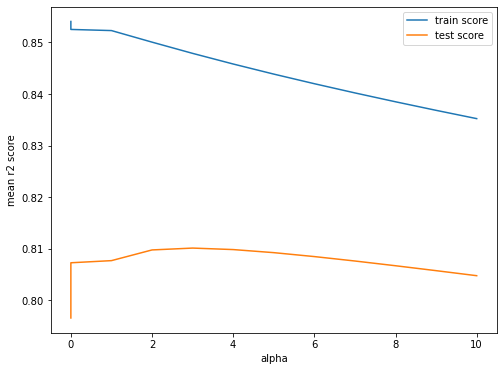

In [237]:
# Plotting mean of Train score
plt.figure(figsize=(8,6))
plt.plot(ridge_results['param_alpha'], ridge_results['mean_train_score'])
# Plotting mean of the Test score
plt.plot(ridge_results['param_alpha'], ridge_results['mean_test_score'])
plt.legend(['train score', 'test score'])
plt.xlabel('alpha')
plt.ylabel('mean r2 score')
plt.show()

In [238]:
# Instantiate Ridge regression with alpha=2
model_ridge = Ridge(alpha=2)
# Fitting the model with the train set
model_ridge.fit(X_train, y_train)

Ridge(alpha=2)

In [239]:
# Model evaluation Ridge Regression
# Model performance on the train set
y_train_pred = model_ridge.predict(X_train)
print(metrics.r2_score(y_true = y_train, y_pred = y_train_pred))

0.8466139247405418


In [240]:
# Model performance on the train set
y_test_pred = model_ridge.predict(X_test)
print(metrics.r2_score(y_true = y_test, y_pred = y_test_pred))

0.8259049837470203


In [241]:
# Coefficients list
model_ridge_parameters = list(model_ridge.coef_)
# Inserting Y Intercept to model parameters list
model_ridge_parameters.insert(0, model_ridge.intercept_)
# Rounding off the coefficients
model_ridge_parameters = [round(i,3) for i in model_ridge_parameters]

cols = X_train.columns
cols = cols.insert(0,'constant')
ridge_param_list = list(zip(cols, model_ridge_parameters))
ridge_param_list

[('constant', 0.068),
 ('LotFrontage', -0.021),
 ('LotArea', 0.055),
 ('MasVnrArea', 0.056),
 ('BsmtFinSF1', 0.042),
 ('BsmtFinSF2', 0.011),
 ('BsmtUnfSF', 0.04),
 ('1stFlrSF', 0.107),
 ('2ndFlrSF', 0.079),
 ('LowQualFinSF', -0.022),
 ('GrLivArea', 0.117),
 ('BsmtFullBath', 0.039),
 ('BsmtHalfBath', 0.002),
 ('FullBath', 0.053),
 ('HalfBath', 0.021),
 ('BedroomAbvGr', 0.01),
 ('KitchenAbvGr', -0.032),
 ('GarageArea', 0.05),
 ('WoodDeckSF', 0.017),
 ('OpenPorchSF', -0.01),
 ('EnclosedPorch', 0.016),
 ('3SsnPorch', 0.024),
 ('ScreenPorch', 0.012),
 ('PoolArea', 0.003),
 ('MiscVal', 0.001),
 ('AgeHouse', -0.03),
 ('MSZoning_RL', 0.017),
 ('LotShape_Reg', -0.004),
 ('LotConfig_Inside', -0.005),
 ('Neighborhood_BrkSide', 0.006),
 ('Neighborhood_CollgCr', -0.016),
 ('Neighborhood_Crawfor', 0.035),
 ('Neighborhood_Edwards', -0.036),
 ('Neighborhood_Gilbert', -0.023),
 ('Neighborhood_NAmes', -0.013),
 ('Neighborhood_NWAmes', -0.011),
 ('Neighborhood_NridgHt', 0.027),
 ('Neighborhood_OldTown', 

In [242]:
#Top 10 features of Ridge regression
ridge_params_df = pd.DataFrame({'Params':cols, 'Coef':model_ridge_parameters})
(ridge_params_df.sort_values('Coef', ascending=False)).head(10)

Params   Coef
10    GrLivArea  0.117
7      1stFlrSF  0.107
8      2ndFlrSF  0.079
0      constant  0.068
3    MasVnrArea  0.056
2       LotArea  0.055
13     FullBath  0.053
17   GarageArea  0.050
63  BsmtQual_Ex  0.047
4    BsmtFinSF1  0.042

In [243]:
#Lasso Regression

In [244]:
params = {'alpha': [0.000001,0.00001,0.0001,0.001, 0.01, 1.0,2]}

In [245]:
# Instantiate Lasso regression
lasso = Lasso()

In [246]:
# Cross validation with 5 folds
model_cv = GridSearchCV(estimator=lasso,
                       param_grid=params,
                       scoring='r2',
                       cv=folds,
                       return_train_score=True,
                       verbose=1)
# Fitting the model with train set
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  35 out of  35 | elapsed:    1.4s finished


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-06, 1e-05, 0.0001, 0.001, 0.01, 1.0, 2]},
             return_train_score=True, scoring='r2', verbose=1)

In [247]:
# creating dataframe with model_cv results
lasso_results = pd.DataFrame(model_cv.cv_results_)
lasso_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.118289      0.041380         0.003126        0.006252       1e-06   
1       0.076611      0.011114         0.003526        0.006105       1e-05   
2       0.022509      0.006276         0.001609        0.003217      0.0001   
3       0.003347      0.006694         0.006247        0.007651       0.001   
4       0.006247      0.007651         0.006527        0.008004        0.01   

              params  split0_test_score  split1_test_score  split2_test_score  \
0   {'alpha': 1e-06}           0.656566           0.739822           0.888482   
1   {'alpha': 1e-05}           0.661769           0.742667           0.888434   
2  {'alpha': 0.0001}           0.688532           0.761815           0.886558   
3   {'alpha': 0.001}           0.713167           0.761584           0.835840   
4    {'alpha': 0.01}           0.444677           0.561309           0.466757   

   split3_test_score  ...  mean_test_score  std_test_score  rank_test_score  \
0           0.840230  ...         0.796922        0.086182                3   
1           0.841687  ...         0.798944        0.084341                2   
2           0.841882  ...         0.806076        0.071564                1   
3           0.797752  ...         0.776499        0.040526                4   
4           0.492897  ...         0.481657        0.043777                5   

   split0_train_score  split1_train_score  split2_train_score  \
0            0.884325            0.863416            0.833392   
1            0.884210            0.863358            0.833264   
2            0.880474            0.859274            0.829481   
3            0.823097            0.807146            0.781874   
4            0.499873            0.498793            0.461588   

   split3_train_score  split4_train_score  mean_train_score  std_train_score  
0            0.847142            0.841987          0.854052         0.018024  
1            0.847044            0.841870          0.853949         0.018031  
2            0.843330            0.837595          0.850031         0.018078  
3            0.794344            0.792798          0.799851         0.014120  
4            0.489604            0.491882          0.488348         0.013943  

[5 rows x 21 columns]

In [248]:
# Plotting the mean of the train and test results
# Converting the 'param_alpha' datatype from object to int
lasso_results['param_alpha'] = lasso_results['param_alpha'].astype('int32')

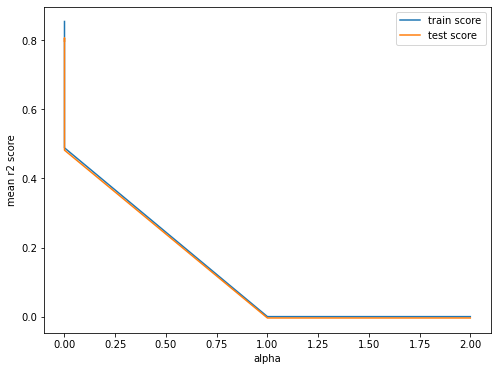

In [249]:
# Plotting mean of Train score
plt.figure(figsize=(8,6))
plt.plot(lasso_results['param_alpha'], lasso_results['mean_train_score'])
# Plotting mean of the Test score
plt.plot(lasso_results['param_alpha'], lasso_results['mean_test_score'])

plt.legend(['train score', 'test score'])
plt.xlabel('alpha')
plt.ylabel('mean r2 score')
plt.show()

In [250]:
# Lasso regression with optimal alpha 0.00

In [251]:
# Instantiate Lasso regression with alpha=0.002
model_lasso = Lasso(0.002)
# Fitting the model with the train set
model_lasso.fit(X_train, y_train)

Lasso(alpha=0.002)

In [252]:
# Model performance on the train set
y_train_pred = model_lasso.predict(X_train)
print(metrics.r2_score(y_true = y_train, y_pred = y_train_pred))

0.7458369471737627


In [253]:
# Model performance on the test set
y_test_pred = model_lasso.predict(X_test)
print(metrics.r2_score(y_true = y_test, y_pred = y_test_pred))

0.6935172646782988


In [254]:
# Coefficients list
model_lasso_parameters = list(model_lasso.coef_)
# Inserting Y Intercept to model parameters list
model_lasso_parameters.insert(0, model_lasso.intercept_)
# Rounding off the coefficients
model_lasso_parameters = [round(i,3) for i in model_lasso_parameters]

cols = X_train.columns
cols = cols.insert(0,'constant')
lasso_param_list = list(zip(cols, model_lasso_parameters))
lasso_param_list

[('constant', 0.17),
 ('LotFrontage', 0.0),
 ('LotArea', 0.0),
 ('MasVnrArea', 0.0),
 ('BsmtFinSF1', 0.0),
 ('BsmtFinSF2', 0.0),
 ('BsmtUnfSF', 0.0),
 ('1stFlrSF', 0.0),
 ('2ndFlrSF', 0.006),
 ('LowQualFinSF', -0.0),
 ('GrLivArea', 0.096),
 ('BsmtFullBath', 0.0),
 ('BsmtHalfBath', -0.0),
 ('FullBath', 0.035),
 ('HalfBath', 0.002),
 ('BedroomAbvGr', 0.0),
 ('KitchenAbvGr', -0.0),
 ('GarageArea', 0.052),
 ('WoodDeckSF', 0.0),
 ('OpenPorchSF', 0.0),
 ('EnclosedPorch', 0.0),
 ('3SsnPorch', 0.0),
 ('ScreenPorch', 0.0),
 ('PoolArea', 0.0),
 ('MiscVal', 0.0),
 ('AgeHouse', -0.0),
 ('MSZoning_RL', 0.01),
 ('LotShape_Reg', -0.008),
 ('LotConfig_Inside', -0.0),
 ('Neighborhood_BrkSide', -0.0),
 ('Neighborhood_CollgCr', -0.0),
 ('Neighborhood_Crawfor', 0.0),
 ('Neighborhood_Edwards', -0.0),
 ('Neighborhood_Gilbert', -0.0),
 ('Neighborhood_NAmes', -0.0),
 ('Neighborhood_NWAmes', 0.0),
 ('Neighborhood_NridgHt', 0.009),
 ('Neighborhood_OldTown', -0.0),
 ('Neighborhood_Sawyer', -0.0),
 ('Neighborhood

In [255]:
# Parameters having coefficients greater than 1
lasso_params_df = pd.DataFrame({'Params':cols, 'Coef':model_lasso_parameters})
lasso_params_df = lasso_params_df.loc[lasso_params_df['Coef'] != 0]
lasso_params_df

Params   Coef
0                   constant  0.170
8                   2ndFlrSF  0.006
10                 GrLivArea  0.096
13                  FullBath  0.035
14                  HalfBath  0.002
17                GarageArea  0.052
26               MSZoning_RL  0.010
27              LotShape_Reg -0.008
36      Neighborhood_NridgHt  0.009
47             OverallQual_8  0.021
52           RoofStyle_Gable -0.016
58           MasVnrType_None -0.007
60              ExterQual_TA -0.029
62          Foundation_PConc  0.003
63               BsmtQual_Ex  0.081
66           BsmtExposure_Gd  0.017
68           BsmtExposure_No -0.002
71          BsmtFinType1_GLQ  0.025
75              HeatingQC_Ex  0.009
78            KitchenQual_TA -0.020
80  FireplaceQu_No Fireplace -0.032
82         GarageType_Attchd  0.007
85          GarageFinish_Fin  0.011
92             MSSubClass_20  0.004
94             MSSubClass_60  0.012

In [256]:
# Number of parameters selected by the Lasso regression
# Minus one as we have constant present in lasso_params_df
len(lasso_params_df)-1

24

In [257]:
# Sorting the parameters with their Coefficient values
lasso_params_df.sort_values('Coef',ascending=False)

Params   Coef
0                   constant  0.170
10                 GrLivArea  0.096
63               BsmtQual_Ex  0.081
17                GarageArea  0.052
13                  FullBath  0.035
71          BsmtFinType1_GLQ  0.025
47             OverallQual_8  0.021
66           BsmtExposure_Gd  0.017
94             MSSubClass_60  0.012
85          GarageFinish_Fin  0.011
26               MSZoning_RL  0.010
36      Neighborhood_NridgHt  0.009
75              HeatingQC_Ex  0.009
82         GarageType_Attchd  0.007
8                   2ndFlrSF  0.006
92             MSSubClass_20  0.004
62          Foundation_PConc  0.003
14                  HalfBath  0.002
68           BsmtExposure_No -0.002
58           MasVnrType_None -0.007
27              LotShape_Reg -0.008
52           RoofStyle_Gable -0.016
78            KitchenQual_TA -0.020
60              ExterQual_TA -0.029
80  FireplaceQu_No Fireplace -0.032